In [23]:
import pandas as pd 

In [3]:
pwd

'C:\\Users\\ANDREW'

In [24]:
df = pd.read_csv('predictive_maintenance.csv')

In [25]:
df.head

<bound method NDFrame.head of         UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  To

In [26]:
df.tail


<bound method NDFrame.tail of         UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  To

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [28]:
df['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [29]:
df['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [31]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [32]:
df.drop(columns=['UDI', 'Product ID','Target'], inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 547.0+ KB


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

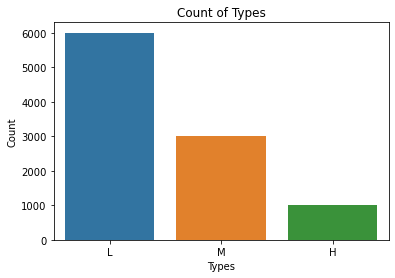

In [14]:
type_counts = df['Type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

sns.barplot(x='Type', y='Count', data=type_counts)

plt.title('Count of Types')
plt.xlabel('Types')
plt.ylabel('Count')
plt.show()

In [15]:
df.duplicated().sum()

0

In [16]:

df_encoded = pd.get_dummies(df, columns=['Type'])
df_encoded

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,No Failure,0,0,1
1,298.2,308.7,1408,46.3,3,No Failure,0,1,0
2,298.1,308.5,1498,49.4,5,No Failure,0,1,0
3,298.2,308.6,1433,39.5,7,No Failure,0,1,0
4,298.2,308.7,1408,40.0,9,No Failure,0,1,0
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,No Failure,0,0,1
9996,298.9,308.4,1632,31.8,17,No Failure,1,0,0
9997,299.0,308.6,1645,33.4,22,No Failure,0,0,1
9998,299.0,308.7,1408,48.5,25,No Failure,1,0,0


In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_encoded['Failure Type_encoded'] = label_encoder.fit_transform(df_encoded['Failure Type'])

df_encoded.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Type_H,Type_L,Type_M,Failure Type_encoded
0,298.1,308.6,1551,42.8,0,No Failure,0,0,1,1
1,298.2,308.7,1408,46.3,3,No Failure,0,1,0,1
2,298.1,308.5,1498,49.4,5,No Failure,0,1,0,1
3,298.2,308.6,1433,39.5,7,No Failure,0,1,0,1
4,298.2,308.7,1408,40.0,9,No Failure,0,1,0,1


In [35]:
df_encoded.drop(columns=['Failure Type'], inplace=True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Type_H                   10000 non-null  uint8  
 6   Type_L                   10000 non-null  uint8  
 7   Type_M                   10000 non-null  uint8  
 8   Failure Type_encoded     10000 non-null  int32  
dtypes: float64(3), int32(1), int64(2), uint8(3)
memory usage: 459.1 KB


In [36]:
# Separate features (X) and encoded target (y)
X = df_encoded.drop(['Failure Type_encoded'], axis=1)  # Drop original and encoded target
y = df_encoded['Failure Type_encoded']

# Display the features and target
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features (X):
   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Type_H  Type_L  Type_M  
0         42.8                0       0       0       1  
1         46.3                3       0       1       0  
2         49.4                5       0       1       0  
3         39.5                7       0       1       0  
4         40.0                9       0       1       0  

Target (y):
0    1
1    1
2    1
3    1
4    1
Name: Failure Type_encoded, dtype: int32


In [37]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training Features (X_train):", X_train.shape)
print("Testing Features (X_test):", X_test.shape)
print("Training Target (y_train):", y_train.shape)
print("Testing Target (y_test):", y_test.shape)

Training Features (X_train): (8000, 8)
Testing Features (X_test): (2000, 8)
Training Target (y_train): (8000,)
Testing Target (y_test): (2000,)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Logistic Regression model
LogisticRegression_model = LogisticRegression(random_state=42)

# Train the model on the balanced training data
LogisticRegression_model.fit(X_train, y_train)

# Predict on the test data
y_pred = LogisticRegression_model.predict(X_test)

# Evaluate the model
print("y_pred:", y_pred)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

y_pred: [1 1 1 ... 1 3 1]
Confusion Matrix:
[[   0   14    1    0    0    0]
 [   0 1929    1    1    0    4]
 [   0   10    3    0    0    0]
 [   1   10    1    8    0    0]
 [   0    6    0    0    0    0]
 [   0    9    2    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.98      1.00      0.99      1935
           2       0.38      0.23      0.29        13
           3       0.89      0.40      0.55        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.97      2000
   macro avg       0.37      0.27      0.30      2000
weighted avg       0.95      0.97      0.96      2000


Accuracy Score: 0.97


C:\Users\ANDREW\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ANDREW\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANDREW\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


decision = DecisionTreeClassifier(class_weight='balanced')
decision.fit(X_train, y_train)


y_pred_dec = decision.predict(X_test)


decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("y_pred_dec    :", y_pred_dec, "%")
print("Training Accuracy    :", decision_train, "%")
print("Model Accuracy Score :", decision_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")


y_pred_dec    : [1 1 1 ... 1 3 1] %
Training Accuracy    : 100.0 %
Model Accuracy Score : 97.4 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.99      0.99      0.99      1935
           2       0.53      0.77      0.62        13
           3       0.80      0.60      0.69        20
           4       0.00      0.00      0.00         6
           5       0.17      0.09      0.12        11

    accuracy                           0.97      2000
   macro avg       0.53      0.53      0.52      2000
weighted avg       0.97      0.97      0.97      2000

--------------------------------------------------------
